## Read and visualise the data

In [14]:
# Importing the required libraries
import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [15]:
# read the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [17]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x16cbf1442e0>,
 'caps': [<matplotlib.lines.Line2D at 0x16cbf1449a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16cbf136f40>],
 'medians': [<matplotlib.lines.Line2D at 0x16cbf1500a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16cbf150400>],
 'means': []}

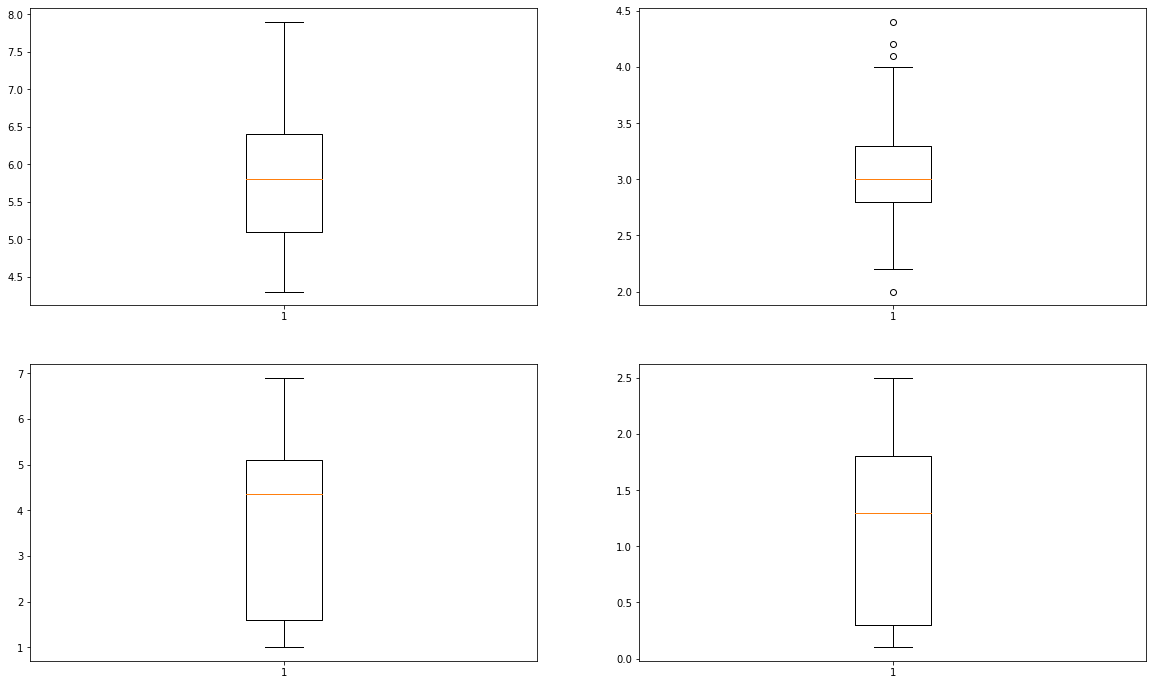

In [19]:
#boxplots for all the attributes
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.boxplot(df['sepal length (cm)'])
plt.subplot(2,2,2)
plt.boxplot(df['sepal width (cm)'])
plt.subplot(2,2,3)
plt.boxplot(df['petal length (cm)'])
plt.subplot(2,2,4)
plt.boxplot(df['petal width (cm)'])

As we can see only sepal width is having some outlier bt since there are very less number of data so we cannot drop those records

#### Rescaling

In [20]:
# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(150, 4)

In [21]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


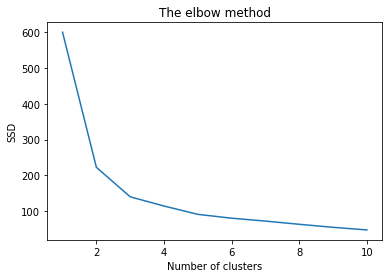

In [31]:
# elbow-curve/SSD
ssd = []
for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range(1, 11), ssd)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

From the elbow curve we can see that 2 is the optimal number of clusters

In [37]:
# silhouette analysis

for num_clusters in range(2,11):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5817500491982808
For n_clusters=3, the silhouette score is 0.45994823920518635
For n_clusters=4, the silhouette score is 0.383850922475103
For n_clusters=5, the silhouette score is 0.3413927532719825
For n_clusters=6, the silhouette score is 0.32203661257077404
For n_clusters=7, the silhouette score is 0.3289494485092277
For n_clusters=8, the silhouette score is 0.3411250418730727
For n_clusters=9, the silhouette score is 0.3334623312078666
For n_clusters=10, the silhouette score is 0.35598639112472746


We choose the no. of clusters as 3

In [40]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = df_scaled.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

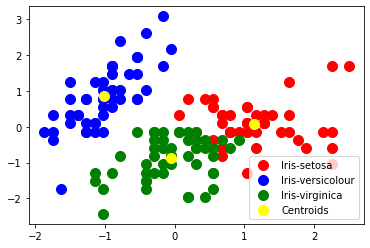

In [41]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

As we can see we are able to clearly identify 3 clusters from the above figure so we conclude that the optimal number of clusters is 3. 